In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = tf.image.resize(train_images[..., tf.newaxis], (48, 48)) / 255.0
test_images = tf.image.resize(test_images[..., tf.newaxis], (48, 48)) / 255.0

In [3]:
train_images = tf.concat([train_images] * 3, axis=-1)
test_images = tf.concat([test_images] * 3, axis=-1)

In [4]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 765s 816ms/step - loss: 0.8483 - accuracy: 0.7505 - val_loss: 0.5635 - val_accuracy: 0.8057
Epoch 2/10
938/938 [==============================] - 522s 556ms/step - loss: 0.5021 - accuracy: 0.8248 - val_loss: 0.4843 - val_accuracy: 0.8268
Epoch 3/10
938/938 [==============================] - 506s 539ms/step - loss: 0.4486 - accuracy: 0.8410 - val_loss: 0.4532 - val_accuracy: 0.8371
Epoch 4/10
938/938 [==============================] - 668s 713ms/step - loss: 0.4200 - accuracy: 0.8502 - val_loss: 0.4296 - val_accuracy: 0.8463
Epoch 5/10
938/938 [==============================] - 663s 707ms/step - loss: 0.4002 - accuracy: 0.8569 - val_loss: 0.4168 - val_accuracy: 0.8492
Epoch 6/10
938/938 [==============================] - 666s 710ms/step - loss: 0.3863 - accuracy: 0.8616 - val_loss: 0.4103 - val_accuracy: 0.8548
Epoch 7/10
938/938 [==============================] - 661s 705ms/step - loss: 0.3753 - accuracy: 0.8650 - val_loss: 0.3992 -

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 59s 188ms/step - loss: 0.3862 - accuracy: 0.8626
Test accuracy: 0.8626000285148621


In [8]:
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1)
true_labels = tf.argmax(test_labels, axis=1)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

313/313 [==============================] - 60s 191ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1000
           1       0.97      0.97      0.97      1000
           2       0.77      0.83      0.80      1000
           3       0.88      0.82      0.85      1000
           4       0.73      0.79      0.76      1000
           5       0.96      0.94      0.95      1000
           6       0.66      0.59      0.62      1000
           7       0.92      0.95      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



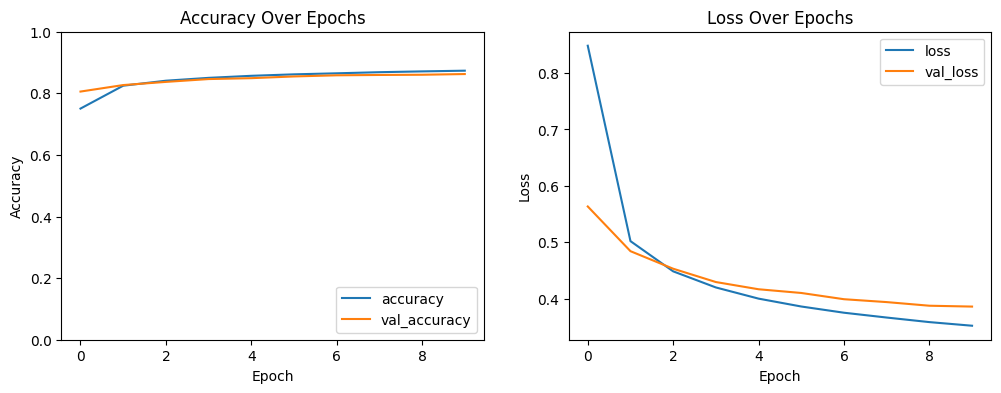

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss Over Epochs')

plt.show()

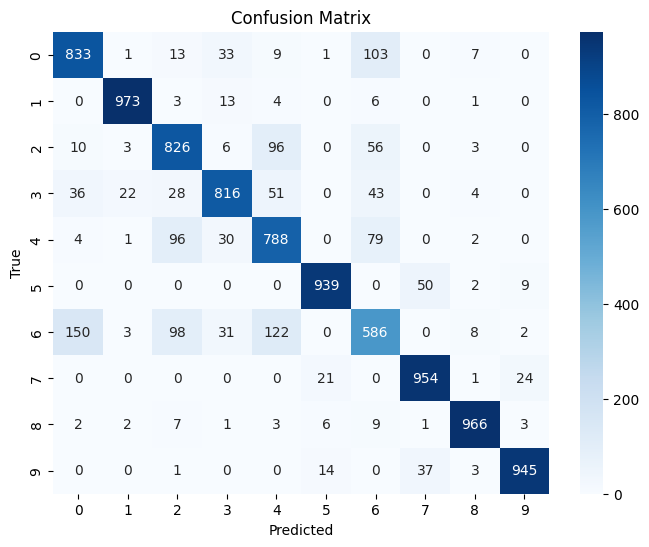

In [13]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()